Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Reading

In [3]:
df=pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.shape

(14640, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

Data Cleaning

In [6]:
# replace empty cells with NaN values, so we can handle them later
df.replace("", np.nan, inplace=True)

In [7]:
# Correct the data type of column'tweet_created' (keep only the date and convert its data type to datetime)
df['tweet_created'] = pd.to_datetime(df['tweet_created']).dt.date
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

In [8]:
df.isnull().mean()*100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [9]:
# Above 90% of columns 'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord' are null values. So, we need to delete these columns 
# as they do not have any valuable information (by drop)

df = df.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis=1)

Data Insights and Visualisation

In [10]:
# the frequency of each sentiment class in our dataset
df1=df['airline_sentiment'].value_counts()
df1

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

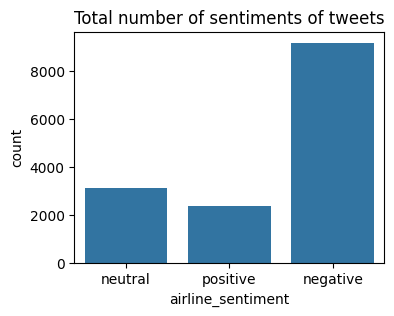

In [11]:
plt.figure(figsize = (4, 3))
ax = sns.countplot(x = 'airline_sentiment', data = df)
plt.title(label = 'Total number of sentiments of tweets')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

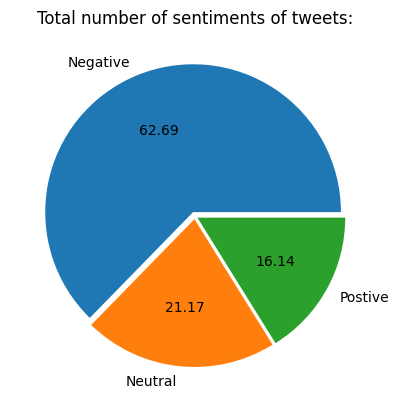

In [12]:
plt.title(label = 'Total number of sentiments of tweets:')
plt.pie(df1,labels=['Negative','Neutral','Postive'],explode=[0.03,0.02,0.02],autopct='%.2f')
plt.show

In [14]:
# negative reviews at each airline individually.
negative_sentiment_counts = df[df['airline_sentiment'] == 'negative']['airline'].value_counts()
negative_sentiment_counts

airline
United            2633
US Airways        2263
American          1960
Southwest         1186
Delta              955
Virgin America     181
Name: count, dtype: int64

C:\Users\Priyanshu Gupta\AppData\Local\Temp\ipykernel_17308\1025388880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='airline', data=negative_df, palette='pastel')


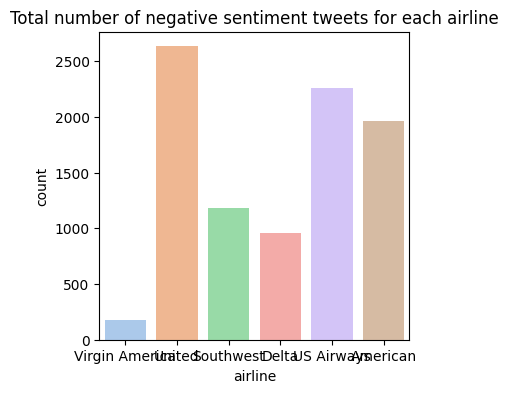

In [20]:
negative_df = df[df['airline_sentiment'] == 'negative']
plt.figure(figsize=(4, 4))
ax = sns.countplot(x='airline', data=negative_df, palette='pastel')
ax.set_title(label='Total number of negative sentiment tweets for each airline')
plt.show()

In [21]:
total_tweets_per_airline = df['airline'].value_counts()
negative_tweets_per_airline = negative_df['airline'].value_counts()
percentage_negative_tweets = (negative_tweets_per_airline / total_tweets_per_airline) * 100


print("Percentage of negative sentiment tweets compared to all sentiments for each airline:")
print(percentage_negative_tweets)

Percentage of negative sentiment tweets compared to all sentiments for each airline:
airline
United            68.890633
US Airways        77.686234
American          71.040232
Southwest         49.008264
Delta             42.979298
Virgin America    35.912698
Name: count, dtype: float64


In [16]:
# Total no. of Tweets of Airline
print("Total number of tweets for each airline :")
df.groupby('airline')['airline_sentiment'].count()

Total number of tweets for each airline :


airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64

Text(0, 0.5, 'No.of Tweets')

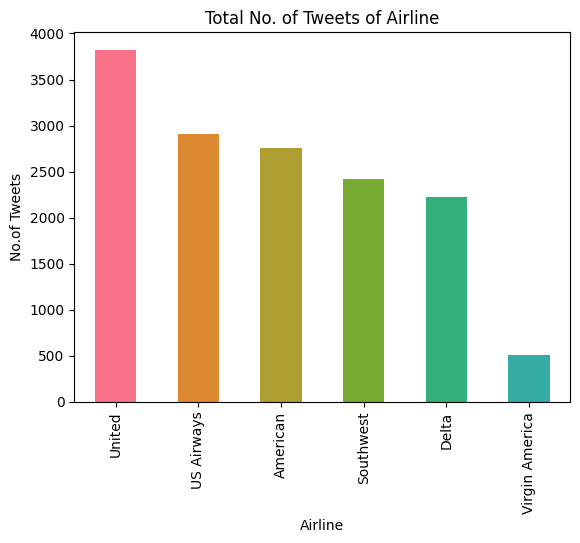

In [17]:
# Total no. of Tweets of Airline
colors=sns.color_palette('husl',10)
df['airline'].value_counts().plot(kind="bar",color=colors,title='Total No. of Tweets of Airline')
plt.xlabel('Airline')
plt.ylabel('No.of Tweets')

In [18]:
#  the numbers of negative, positive, and neutral tweets at each airline.
df_grouped_airsent = df.groupby(['airline', 'airline_sentiment']).size()
pd.DataFrame(df_grouped_airsent)

0
airline        airline_sentiment      
American       negative           1960
               neutral             463
               positive            336
Delta          negative            955
               neutral             723
               positive            544
Southwest      negative           1186
               neutral             664
               positive            570
US Airways     negative           2263
               neutral             381
               positive            269
United         negative           2633
               neutral             697
               positive            492
Virgin America negative            181
               neutral             171
               positive            152

Reasons Of Negative Tweets

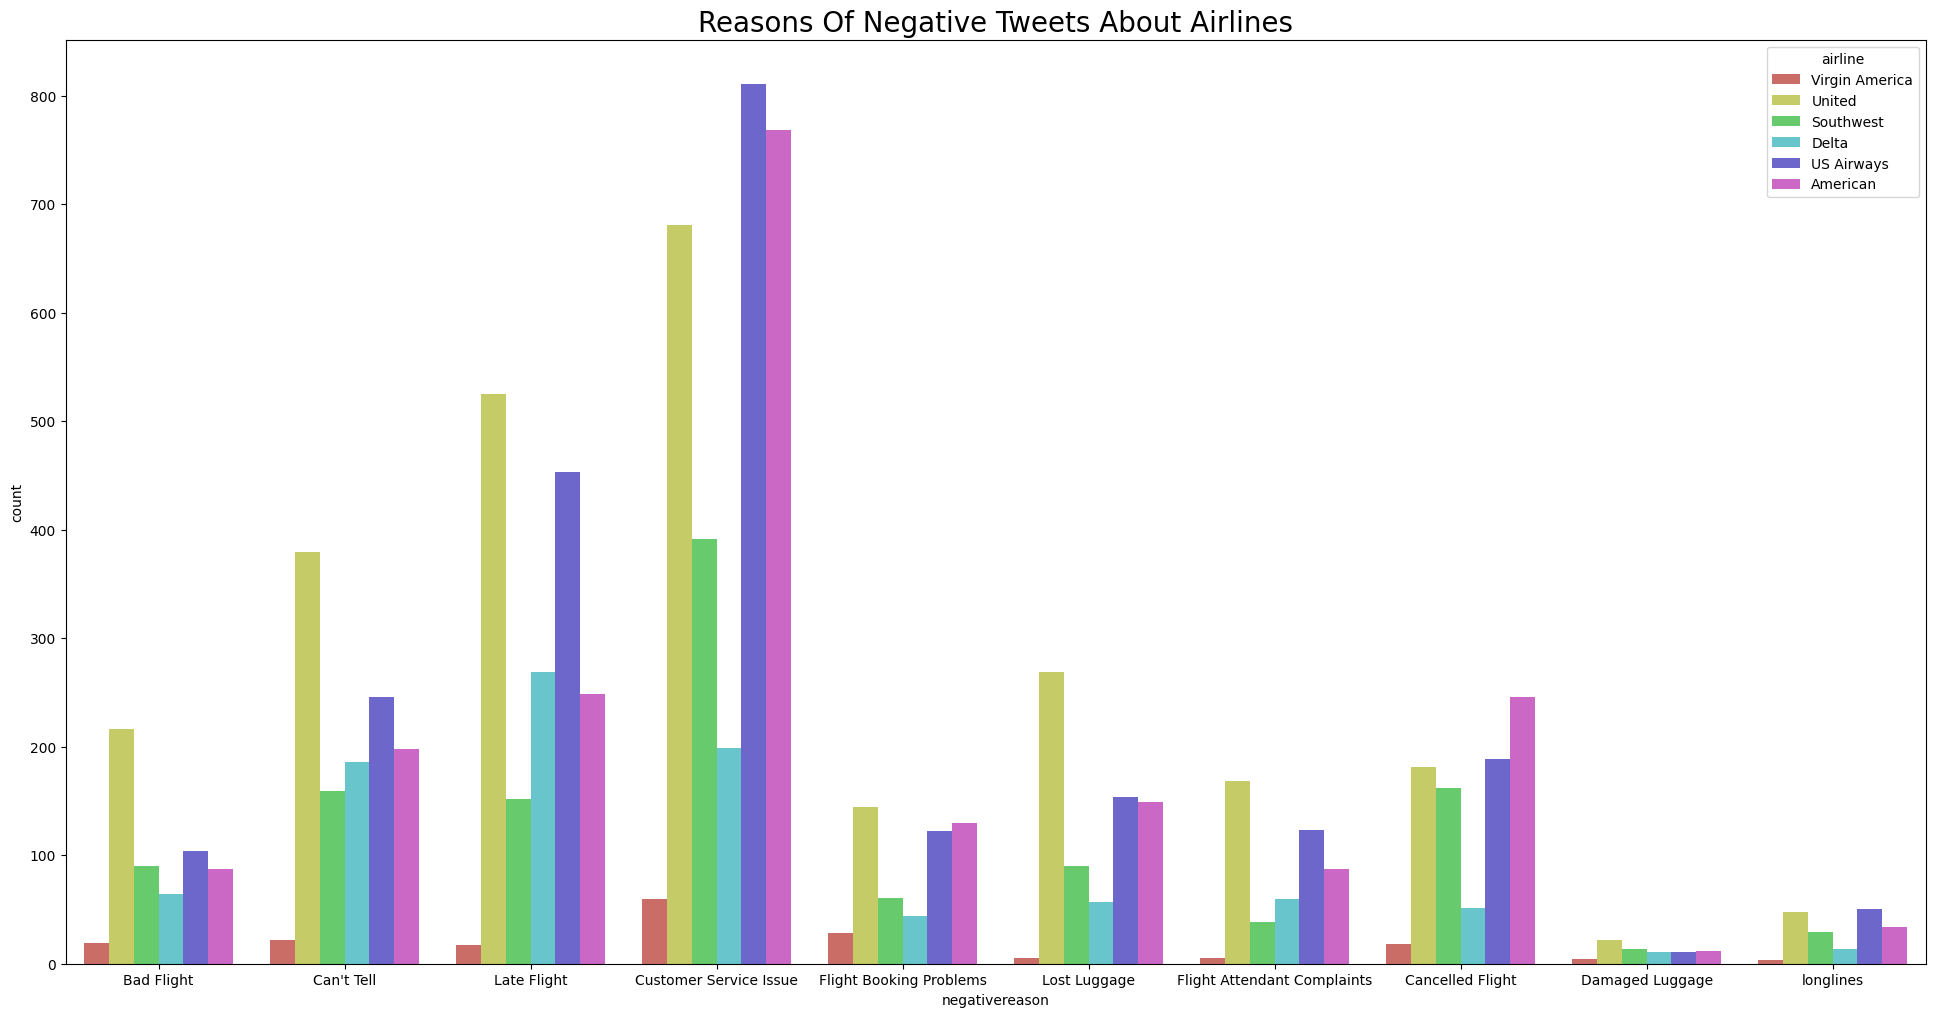

In [25]:
# the reasons of negative reviews of each airline
df['negativereason'].value_counts()
plt.figure(figsize = (24, 12))
sns.countplot(x = 'negativereason', data = df, palette = 'hls',hue='airline')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

Now Reasons Of Negative Tweets on Every AirLine Company

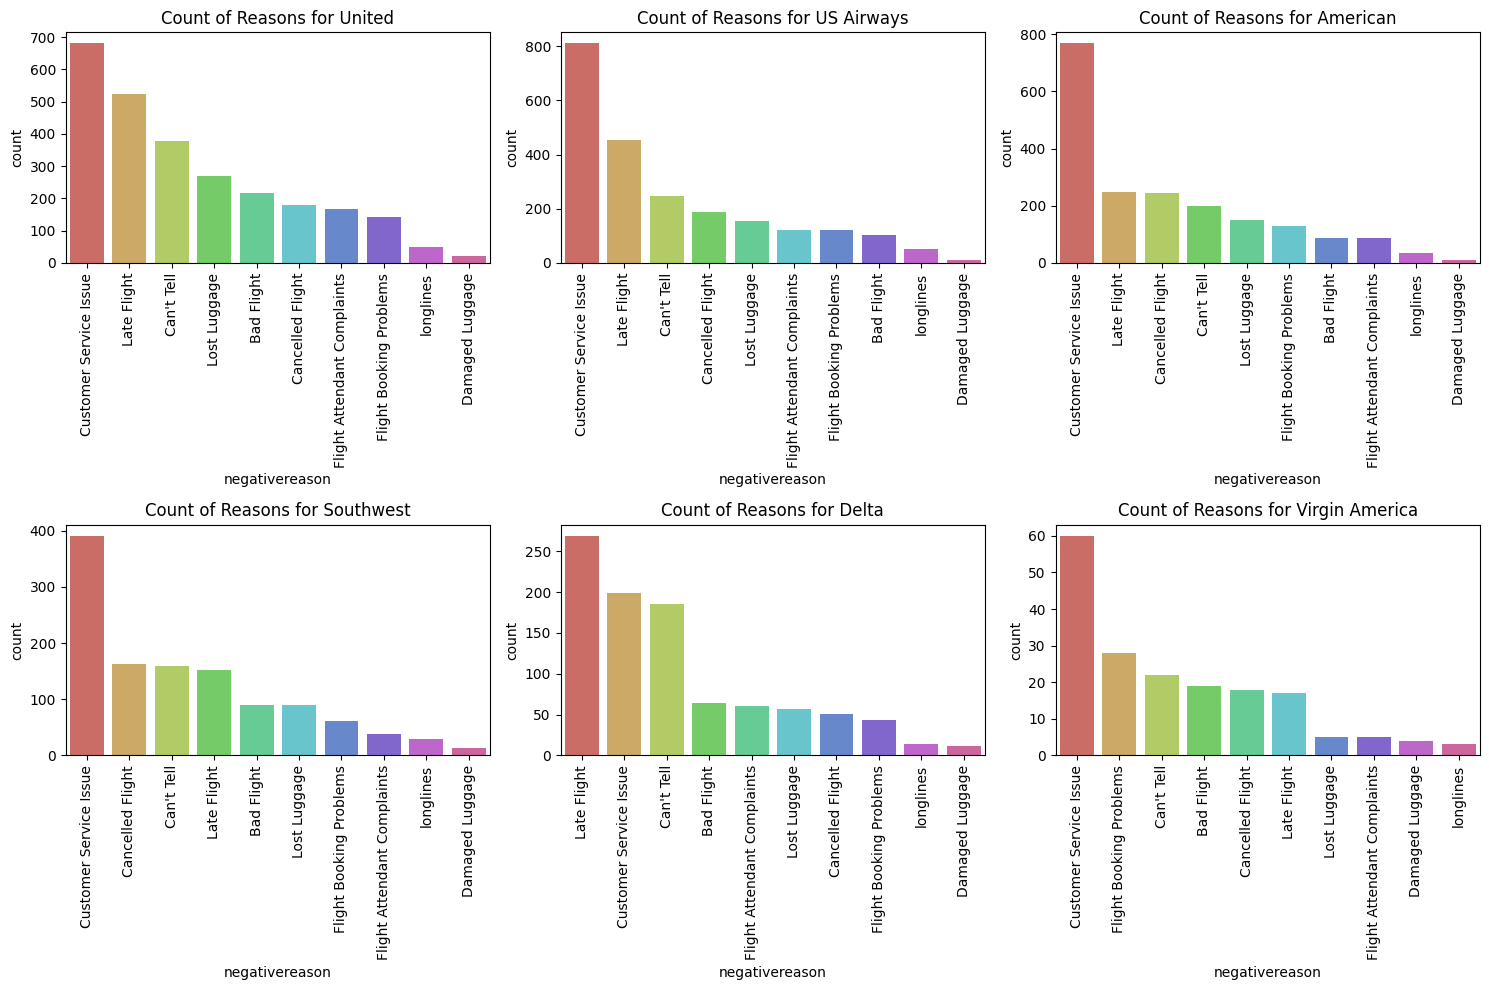

In [45]:
def plot_reason(Airline):
    df2 = df[df['airline']==Airline]
    count=df2['negativereason'].value_counts().reset_index()
    sns.barplot(x='negativereason',y='count',data=count,palette = 'hls',hue='negativereason')
    plt.title('Count of Reasons for '+Airline)
    plt.xticks(rotation=90)
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plot_reason('United')
plt.subplot(2,3,2)
plot_reason('US Airways')
plt.subplot(2,3,3)
plot_reason('American')
plt.subplot(2,3,4)
plot_reason('Southwest')
plt.subplot(2,3,5)
plot_reason('Delta')
plt.subplot(2,3,6)
plot_reason('Virgin America')
plt.tight_layout()
plt.show()